# 911 Calls Capstone Project

Analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv("C:\\Users\\alexa\\911.csv")

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


** Check the head of df **

In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [10]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Exploring data

** Top 5 zipcodes for 911 calls **

In [14]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** Top 5 townships (twp) for 911 calls? **

In [18]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** unique title codes **

In [20]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() I'm going to create a new column called "Reason" that contains string values.** 


In [11]:
df['Reason'] = df['title'].apply(lambda res: res.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [177]:
df['Reason'].value_counts().head(3).sort_values(ascending=True)

Reason
Fire       14920
Traffic    35695
EMS        48877
Name: count, dtype: int64

In [12]:
df['Reason'].value_counts().head(3)

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [13]:
import seaborn as sns

** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='Reason', ylabel='count'>

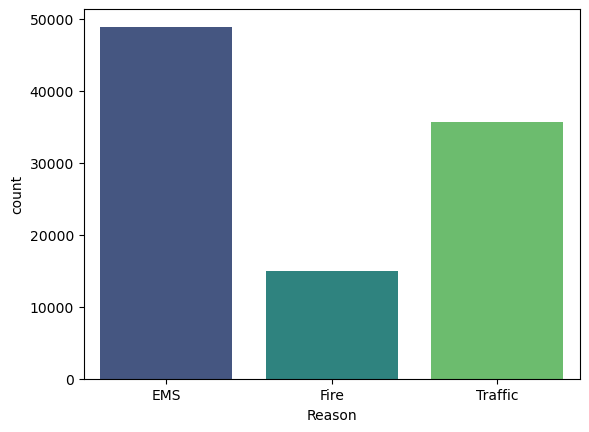

In [52]:
sns.countplot(data=df, x='Reason', palette=("viridis"))


___
** Checking the data type of the objects in the timeStamp column **

In [15]:
type(df['timeStamp'].iloc[1])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
time = df['timeStamp'].iloc[0]

In [185]:
time.day_of_week #now we can grab some information using various attributes

3

In [21]:
time.hour

17

In [22]:
time.month

12

In [23]:
time.date()

datetime.date(2015, 12, 10)

In [24]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

Here using .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df['hour'] = df.apply(lambda x: x.timeStamp.hour, axis=1)  #df['hour']=df['timeStamp'].apply(lambda time:time.hour) Same output

In [26]:
df['month'] = df.apply(lambda y: y.timeStamp.month, axis=1)

In [27]:
df['weekday'] = df.apply(lambda z: z.timeStamp.day_of_week, axis=1)  #df['weekday'] = df['weekday'].map(dmap)

In [28]:
df['weekday'] = df['weekday'].map(dmap)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  hour       99492 non-null  int64         
 11  month      99492 non-null  int64         
 12  weekday    99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


***Creating a countplot of the Day of Week column with the hue based off of the Reason column.*** 

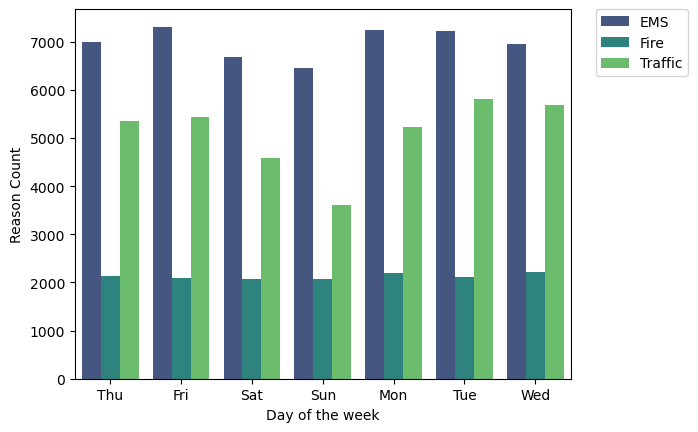

In [31]:
sns.countplot(data=df, x='weekday', hue= 'Reason', palette=("viridis"))
plt.xlabel('Day of the week')
plt.ylabel('Reason Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #to place legend outside the plot

**Now do the same for Month:**

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

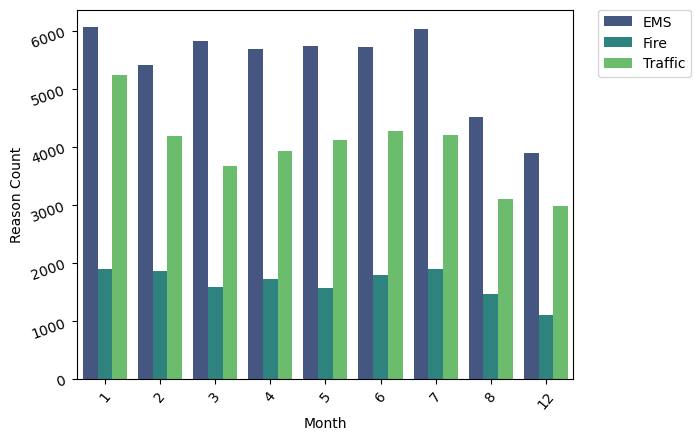

In [32]:
sns.countplot(data=df, x='month', hue= 'Reason', palette=("viridis"))
plt.xlabel('Month')
plt.ylabel('Reason Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)

Plot is missing some Months, maybe plot the information in another way 

***Creating a gropuby object called byMonth, where the DataFrame grouped by the month column and use the count() method for aggregation.***

In [33]:
byMonth = df.groupby('month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,weekday
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Line plot off the dataframe indicating the count of calls per month. **

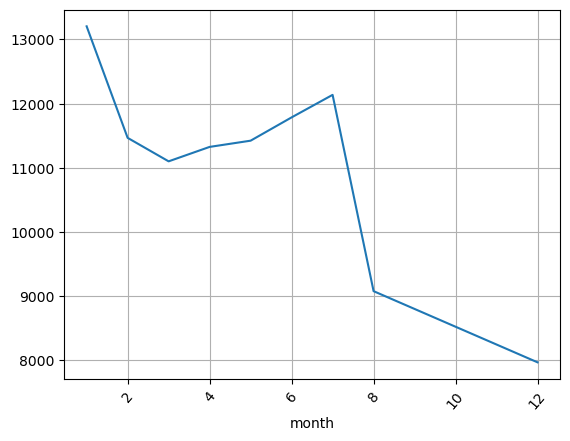

In [34]:
byMonth['lat'].plot() # here I take 'lat' column just to plot all calls count by month
plt.xticks(rotation = 50)
plt.grid()

** Try lmplot() to create a linear fit on the number of calls per month. **

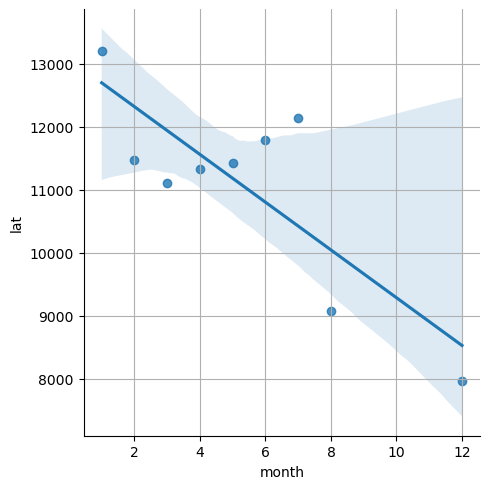

In [316]:
sns.lmplot(x='month', y='lat', data=byMonth.reset_index()) # Without reset_index month taken as an index not as a column
plt.grid()

**Create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [35]:
df['Date'] = df.apply(lambda x: x.timeStamp.date(), axis=1)

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,weekday,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

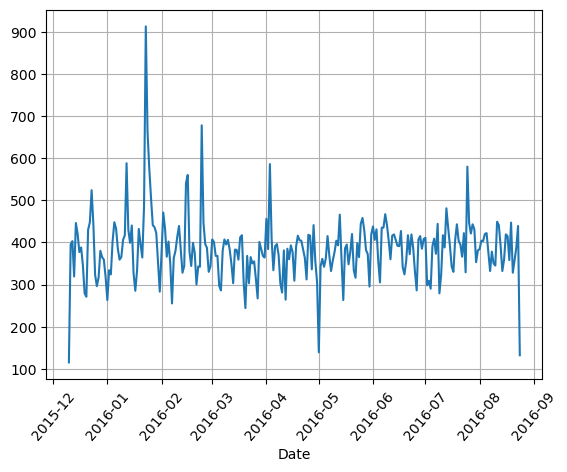

In [39]:
df.groupby('Date').count()['twp'].plot()
plt.xticks(rotation=50)
plt.grid()
#plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

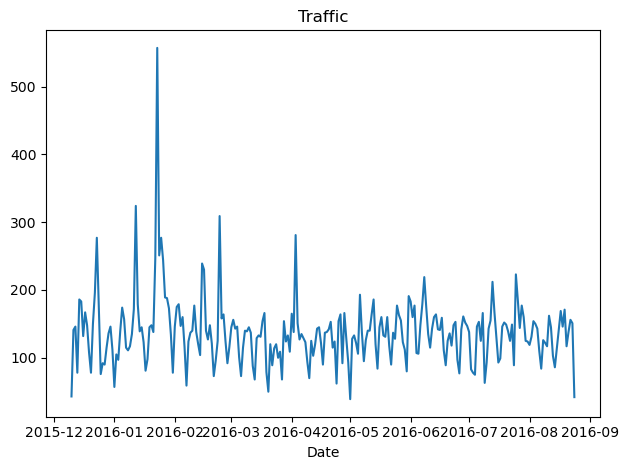

In [263]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

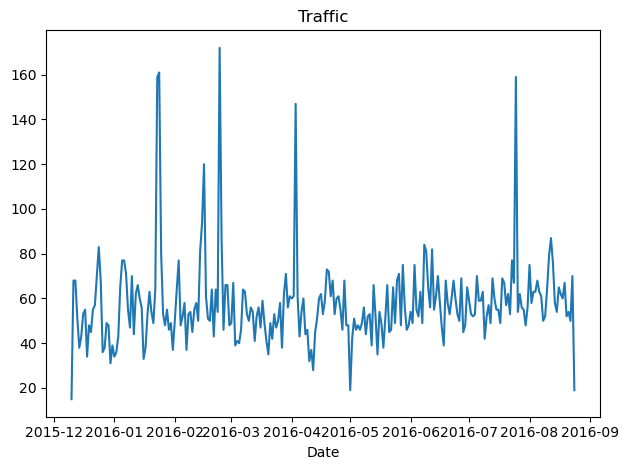

In [264]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

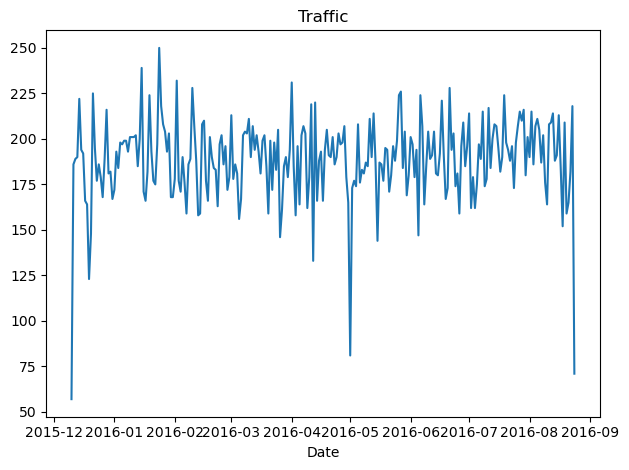

In [265]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

____
** Creating heatmaps. First need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [267]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,weekday,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


In [43]:
dayHour = df.groupby(['weekday','hour']).count()['Reason'].unstack() #count()['Reason'] basically count number of instances, any column might be taken instead
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


In [42]:
dayHour = df.groupby(['weekday','hour'])['Reason'].count().unstack()       #Same output
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [283]:
dfPivot = df.pivot_table(index=['weekday'], columns=['hour'], values=['Reason'], aggfunc='count') #Same output using pivot
dfPivot.head()

Reason                                               ...            \
hour        0    1    2    3    4    5    6    7    8    9   ...   14   15   
weekday                                                      ...             
Fri        275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon        282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat        375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun        383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu        278  202  233  159  182  203  362  570  777  828  ...  876  969   

                                                   
hour       16    17   18   19   20   21   22   23  
weekday                                            
Fri      1039   980  820  696  667  559  514  474  
Mon       989   997  885  746  613  497  472  325  
Sat       848   757  778  696  628  572  506  467  
Sun       663   714  670  655  537  461  415  330  
Thu       935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='hour', ylabel='weekday'>

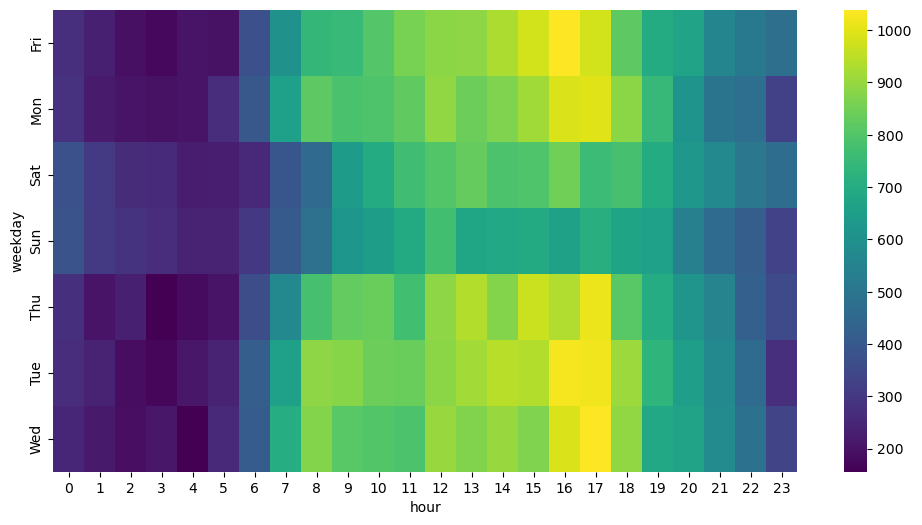

In [297]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

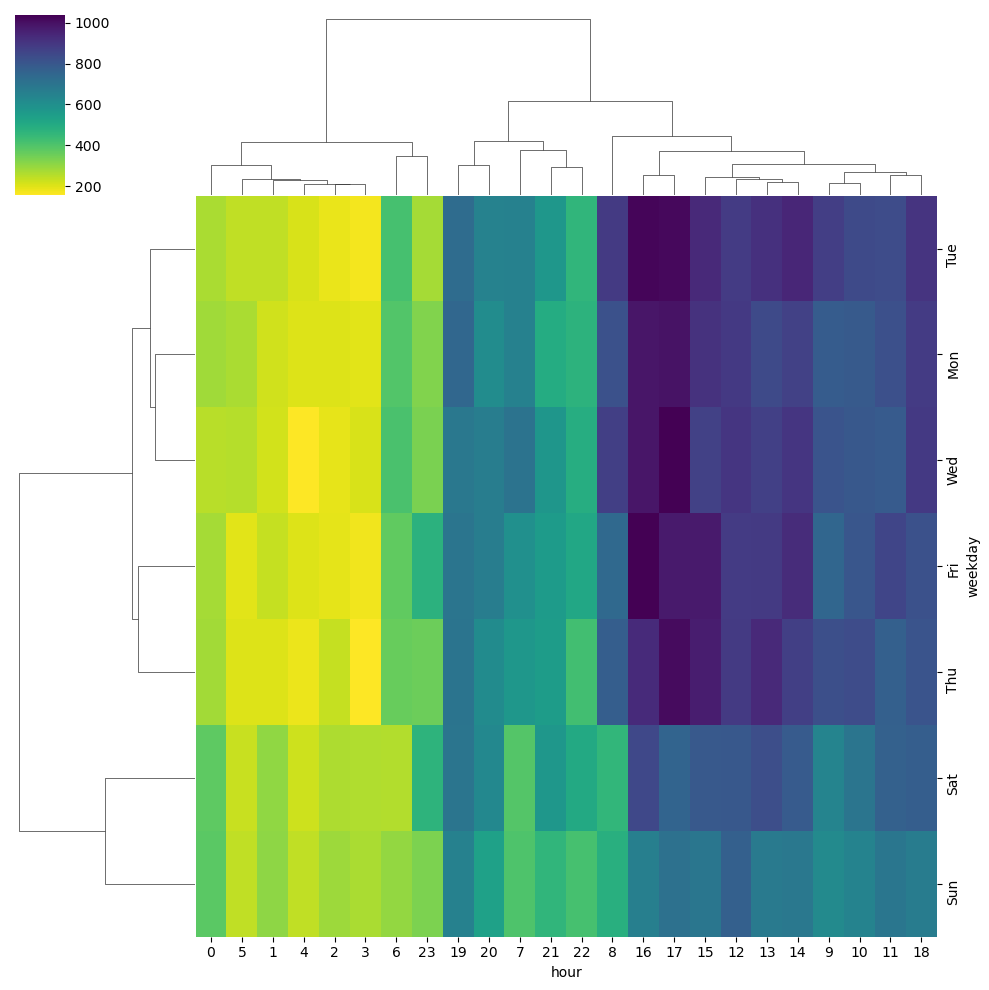

In [311]:
sns.clustermap(dayHour, cmap='viridis_r')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [44]:
dayMonth = df.groupby(['weekday','month'])['Reason'].count().unstack()      
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
weekday,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [45]:
dfPivotMonth = df.pivot_table(index=['weekday'], columns=['month'], values=['Reason'], aggfunc='count') #Same output using pivot
dfPivotMonth.head()

Reason                                                
month       1     2     3     4     5     6     7     8     12
weekday                                                       
Fri       1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon       1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat       2291  1441  1266  1734  1444  1388  1695  1099   978
Sun       1960  1229  1102  1488  1424  1333  1672  1021   907
Thu       1584  1596  1900  1601  1590  2065  1646  1230  1266

<Axes: xlabel='None-month', ylabel='weekday'>

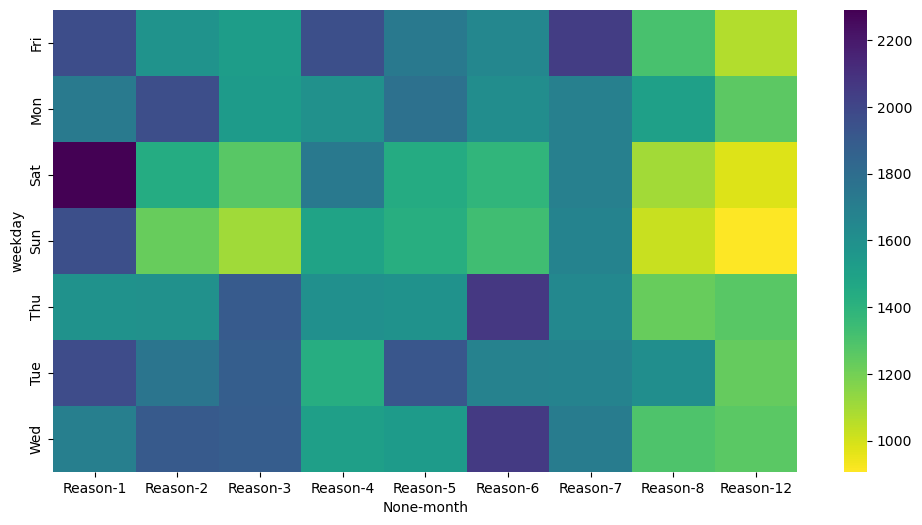

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(dfPivotMonth,cmap='viridis_r')

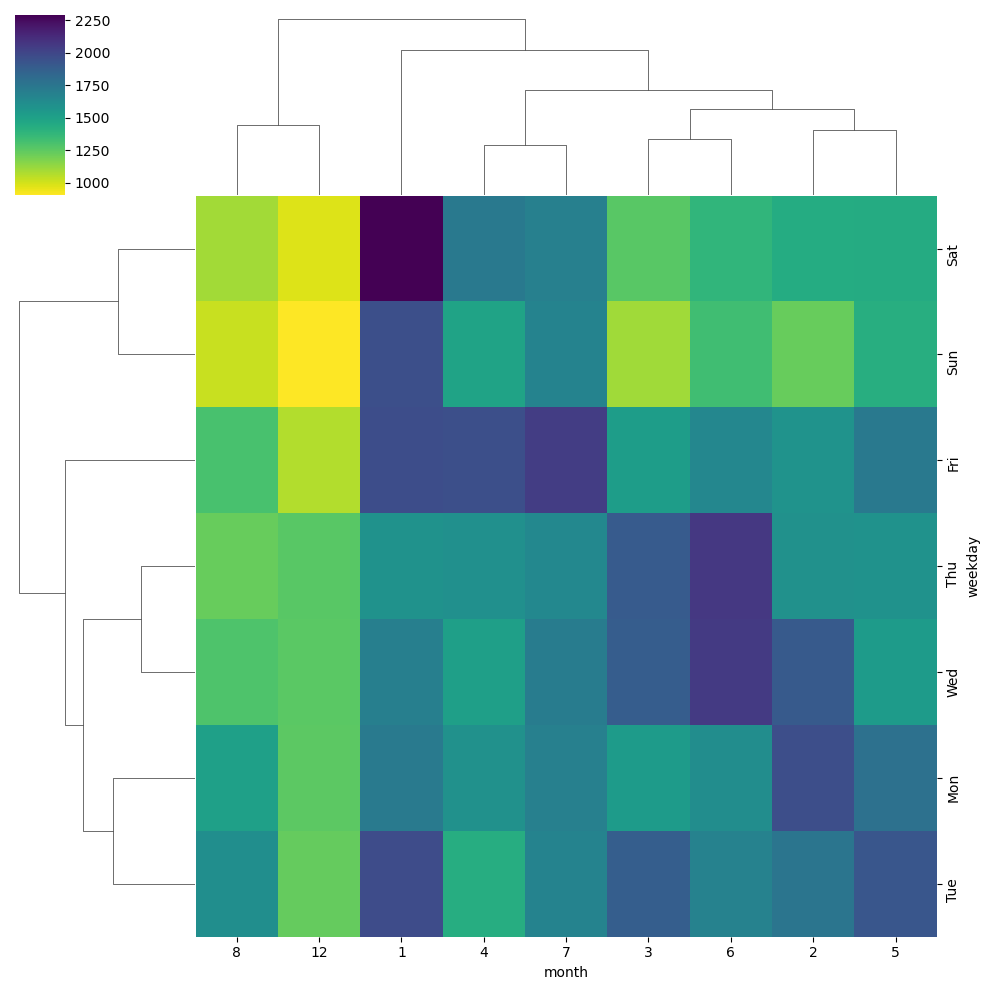

In [312]:
sns.clustermap(dayMonth, cmap='viridis_r')